In [110]:
import pandas as pd
import re
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [111]:
# Read all the files
file_path_r = "files/raw"
file_path_m = "files/modified"
file_name = ["res-engelsk.xlsx","res-norsk.xlsx"]
all_data = []

for file in file_name:
    all_data.append(pd.read_excel(file_path_r + "/" + file,index_col=None))

# Combine all the tables together into one
data = pd.concat(all_data, axis = 0, ignore_index=True)

# Rename columns to fit the syntax
data = data.rename(columns={"$answer_time_ms":"answerTime_ms",
                     "$created":"created"})

# Remove unecessary column
data = data.drop('$submission_id',axis=1)

# Create a multi-level table
split_symbols = '[._]' # These define a level

columns = [re.split(split_symbols, c) for c in data.columns]
data.columns = pd.MultiIndex.from_tuples(columns, names = ['Main','Sub'])

C:\Users\nikoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\nikoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


13
Index(['answerTime', 'code', 'created', 'electricProd', 'energySource',
       'importOutlook', 'opinions', 'powerLine', 'renewableVariance',
       'sunPower', 'windConsideration', 'windMun', 'windVisual'],
      dtype='object', name='Main')


Sub,NaN
0,Income\ncost\nnature
1,long term effect\nside effects
2,resident health\nspecies safety \nthe impact o...
3,1. effectiveness\n2. future inovation\n3.cost\...
4,1.Efficiency\n2.Net revenue\n3.Sustainability
...,...
60,NaN
61,Kostnader/utgifter \nMiljø\nTidsbruk av bygging
62,NaN
63,"Utvikling av samfunnet, økonomisk vekst, miljø..."


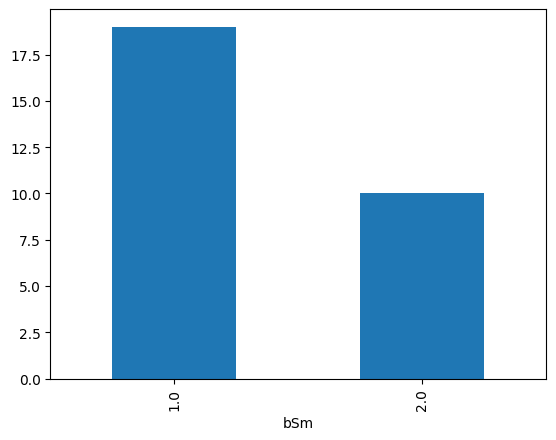

In [112]:
# Use the multilevel column data object
print(len(data.columns.levels[0]))
print(data.columns.levels[0])
#data["energySource"]["offOn"].value_counts().plot.bar()
#data["energySource"]["offOffs"].value_counts().plot.bar()
data["energySource"]["bSm"].value_counts().plot.bar()
#data["energySource"]["bBs"].value_counts().plot.bar()
#data["energySource"]["smSms"].value_counts().plot.bar()

data["code"]
data["opinions"]
data["energySource"]
data["windMun"]
data["windVisual"]
data["windConsideration"]
data["sunPower"]
data["electricProd"]
data["renewableVariance"]
data["importOutlook"]
data["powerLine"]

data["opinions"]

#Finish

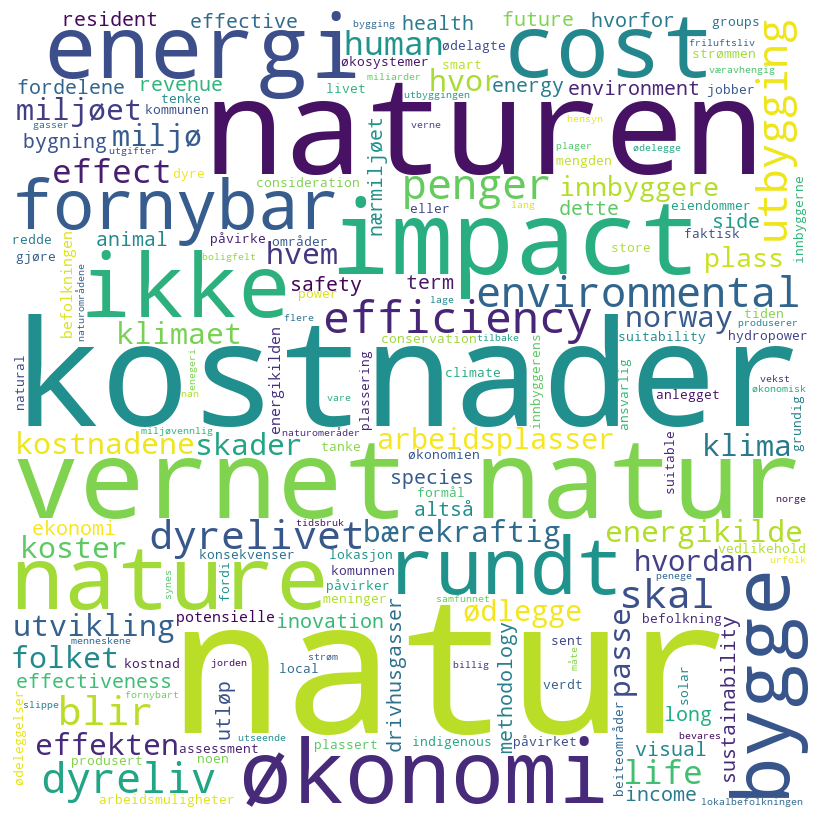

In [113]:
# wordcloud
words = data["opinions"].dropna(axis=0)

# Give new column name
column_name = "opinions"
words = words.rename(columns = {np.nan:"opinions"})

# Creaete a pandas.Series object and split it into words
split_symbols = "[\n1.2.3.() /,-]"
symbols = words["opinions"].apply(lambda x: list(filter(None, re.split(split_symbols, x.lower()))))

def remove_short(x: str):
    if (len(x) > 3):
        return x
    else:
        return None

symbols = symbols.apply(lambda x: list(filter(remove_short,x)))
text = symbols.explode().to_list() # Flatten the list  

# Create wordcloud
text_str = " ".join([str(t) for t in text]) # Convert to a string object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,  # You can add a set of words to exclude here
                      min_font_size = 10).generate(text_str)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Create bag of words representation to find word frequency
bag_of_words = symbols.str.get_dummies(sep=' ')
word_counts = bag_of_words.sum(axis=0)
top_words = word_counts.nlargest(10)

1.0    16
2.0    13
Name: count, dtype: int64
offOffs
2.0    19
1.0    17
Name: count, dtype: int64
            onshore  offshore
                 16        17
inc. solar       13        19


<Axes: >

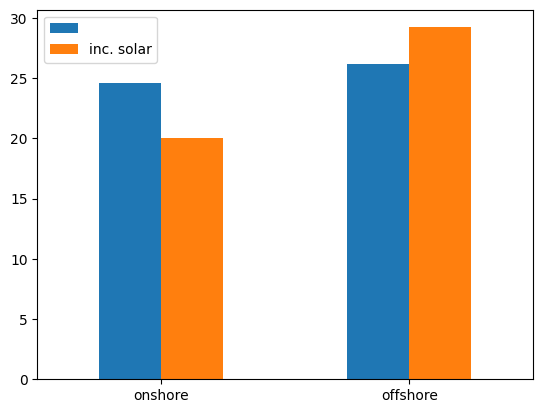

In [114]:
count_offshore = data["energySource"]["offOffs"].value_counts()
count_onshore_big = data["energySource"]["bBs"].value_counts()
count_onshore_small = data["energySource"]["smSms"].value_counts()

count_onshore = count_onshore_big + count_onshore_small

# See the values
print(count_onshore_small + count_onshore_big)
print(count_offshore)

# Combine into a dataframe and plot a simple bar-graph
wind_solar = pd.concat([count_onshore, count_offshore], axis = 1)
wind_solar.columns = ["onshore","offshore"]
wind_solar.index = ["","inc. solar"]

print(wind_solar)

# Convert to percentage and plot
total_responses = sum(wind_solar.aggregate(lambda x: x.sum()))
wind_solar = wind_solar.apply(lambda x: (x / total_responses)*100) # Convert to percentage
wind_solar.T.plot.bar(rot = 0)

Sub
ocean          6.492308
rock           6.015385
hill           5.769231
coast          5.261538
industry       5.123077
grass          5.000000
agriculture    4.200000
housing        3.492308
forest         3.369231
dtype: float64


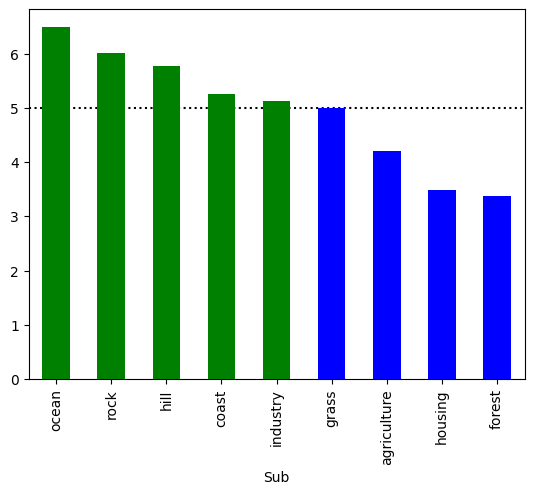

In [115]:
wind_visual = data["windVisual"].mean().sort_values(ascending = False)

print(wind_visual)

# TODO: set index to 1
center = 5
colors = ["green" if value > center else "blue" for value in wind_visual]
ax = wind_visual.plot.bar(color = colors,zorder = 3)
ax.axhline(y=center,color = "black",linestyle = "dotted",zorder = 2)


Sub
ecological        3.815385
economic          3.384615
infrastructure    3.276923
remote            3.153846
nature            2.984615
closeness         2.830769
city              2.753846
dtype: float64


[]

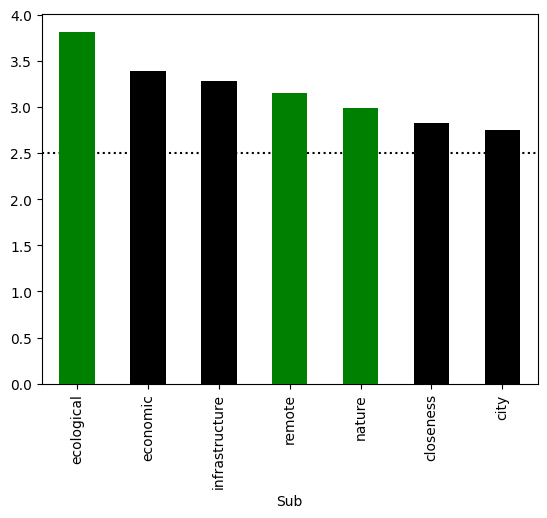

In [116]:
wind_consideration = data["windConsideration"].mean().sort_values(ascending = False)

print(wind_consideration)

# TODO: set index to 1
center = 5/2
untouched_nature = ["remote","nature","ecological"]
colors = ["green" if col in untouched_nature else "black" for col in wind_consideration.index]
ax = wind_consideration.plot.bar(color = colors,zorder = 3)
ax.axhline(y=center,color = "black",linestyle = "dotted",zorder=2)
ax.plot()

In [117]:
powerstation_consideration = data["electricProd"]

print(powerstation_consideration)

# TODO: look at correlation in the way students responded (for example relation between cost -> not nature or similar)
# The sum is not that interesting since they are quite similar

Sub  pollution  capacity  cost  ecological
0            1         1     1           0
1            1         0     0           1
2            0         0     1           1
3            0         1     0           0
4            0         0     1           1
..         ...       ...   ...         ...
60           1         1     1           1
61           0         1     1           0
62           1         1     1           1
63           0         1     1           0
64           1         1     1           1

[65 rows x 4 columns]


category
storing        20
trading        20
exporting      19
consumption     6
Name: category, dtype: int64


<Axes: xlabel='category'>

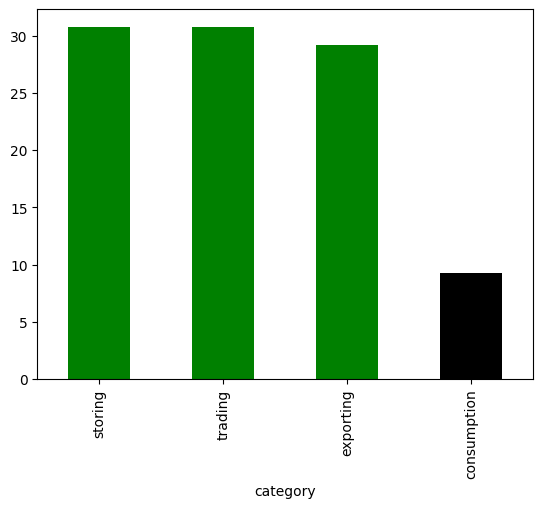

In [140]:
renewable_variance = data["renewableVariance"]
renewable_variance.columns = ["category"]

# Count the amount of chosen category
renewable_variance = renewable_variance.groupby('category')['category'].count().sort_values(ascending = False)

print(renewable_variance)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100

min_value = renewable_variance.min()
colors = ["green" if (val > min_value) else "black" for val in renewable_variance]
renewable_variance.plot.bar(color = colors)

category
balanced    29
more        19
same        17
Name: category, dtype: int64


<Axes: xlabel='category'>

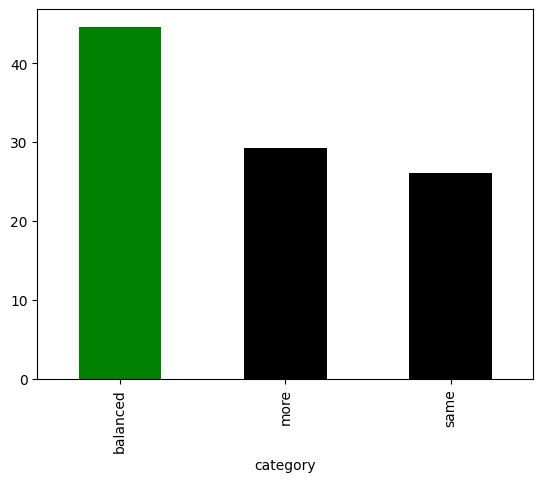

In [145]:
import_outlook = data["importOutlook"]
import_outlook.columns = ["category"]

# Count the amount of chosen category
import_outlook = import_outlook.groupby('category')['category'].count().sort_values(ascending = False)

print(import_outlook)

# Plot the relative difference
import_outlook = (import_outlook / sum(import_outlook)) * 100

max_value = import_outlook.max()
colors = ["black" if (val < max_value) else "green" for val in import_outlook]
import_outlook.plot.bar(color = colors)

In [146]:
power_lines = data["importOutlook"]
power_lines.columns = ["category"]

# Count the amount of chosen category
power_lines = power_lines.groupby('category')['category'].count().sort_values(ascending = False)

print(power_lines)

# Plot the relative difference
power_lines = (power_lines / sum(power_lines)) * 100

max_value = power_lines.max()
colors = ["black" if (val < max_value) else "green" for val in power_lines]
power_lines.plot.bar(color = colors)

Sub,NaN
0,overground
1,underground
2,overground
3,underground
4,overground
...,...
60,underground
61,overground
62,underground
63,overground
